In [4]:
import os
import cv2

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import tensorflow as tf
import keras 

from keras.models  import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [5]:
path1 = 'E:\Emotin'
face = ['Happy' , 'Sad']

In [6]:
for i in face:
    folders = os.path.join(path1 , i)
    print(folders)

E:\Emotin\Happy
E:\Emotin\Sad


In [7]:
for i in face:
    folders = os.path.join(path1 , i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        print(image_path)

E:\Emotin\Happy\Happy-1.jpg
E:\Emotin\Happy\Happy-10.jpg
E:\Emotin\Happy\Happy-100.jpg
E:\Emotin\Happy\Happy-101.jpg
E:\Emotin\Happy\Happy-102.jpg
E:\Emotin\Happy\Happy-103.jpg
E:\Emotin\Happy\Happy-104.jpg
E:\Emotin\Happy\Happy-105.jpg
E:\Emotin\Happy\Happy-106.jpg
E:\Emotin\Happy\Happy-107.jpg
E:\Emotin\Happy\Happy-108.jpg
E:\Emotin\Happy\Happy-109.jpg
E:\Emotin\Happy\Happy-11.jpg
E:\Emotin\Happy\Happy-110.jpg
E:\Emotin\Happy\Happy-111.jpg
E:\Emotin\Happy\Happy-112.jpg
E:\Emotin\Happy\Happy-113.jpg
E:\Emotin\Happy\Happy-114.jpg
E:\Emotin\Happy\Happy-115.jpg
E:\Emotin\Happy\Happy-116.jpg
E:\Emotin\Happy\Happy-117.jpg
E:\Emotin\Happy\Happy-118.jpg
E:\Emotin\Happy\Happy-119.jpg
E:\Emotin\Happy\Happy-12.jpg
E:\Emotin\Happy\Happy-120.jpg
E:\Emotin\Happy\Happy-121.jpg
E:\Emotin\Happy\Happy-122.jpg
E:\Emotin\Happy\Happy-123.jpg
E:\Emotin\Happy\Happy-124.jpg
E:\Emotin\Happy\Happy-125.jpg
E:\Emotin\Happy\Happy-126.jpg
E:\Emotin\Happy\Happy-127.jpg
E:\Emotin\Happy\Happy-128.jpg
E:\Emotin\Happy

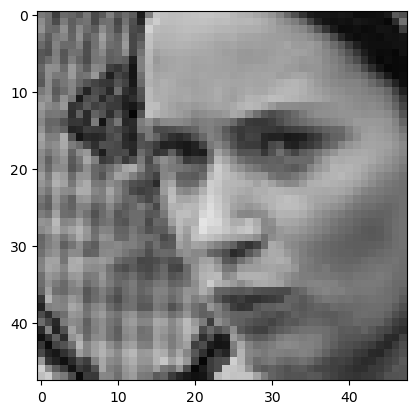

In [8]:
for i in face:
    folders = os.path.join(path1 , i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break
# just to show image

In [9]:
image_size = 200
path1 = 'E:\Emotin'
face = ['Happy' , 'Sad']

input_image = []
for i in face:
    folders = os.path.join(path1 , i)
    label = face.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array , (image_size , image_size))
        input_image.append([image_array , label])

In [10]:
len(input_image)

4000

In [11]:
np.random.shuffle(input_image)

In [12]:
X = []
Y = []

for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [13]:
X = np.array(X)
Y = np.array(Y)

In [14]:
X_train = X[0 : 3200]
Y_train = Y[0 : 3200]


X_test = X[3200 : 4000]
Y_test = Y[3200:  4000]

In [15]:
len(Y_test)

800

In [16]:
X_train = X_train/ 255
X_test  = X_test / 255

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(128 , activation='relu' , input_shape = X.shape[1:]))# Dense layer
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
adam = tf.keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(X_train,Y_train , epochs=20,validation_split=0.1  )

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 435ms/step - accuracy: 0.4884 - loss: 0.6941 - val_accuracy: 0.5219 - val_loss: 0.6928
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 424ms/step - accuracy: 0.4811 - loss: 0.6937 - val_accuracy: 0.4750 - val_loss: 0.6931
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 459ms/step - accuracy: 0.5232 - loss: 0.6902 - val_accuracy: 0.5594 - val_loss: 0.6918
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 451ms/step - accuracy: 0.5245 - loss: 0.6841 - val_accuracy: 0.6094 - val_loss: 0.6751
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 454ms/step - accuracy: 0.6268 - loss: 0.6631 - val_accuracy: 0.5906 - val_loss: 0.6794
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 455ms/step - accuracy: 0.6144 - loss: 0.6467 - val_accuracy: 0.5906 - val_loss: 0.6717
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 449ms/step - accuracy: 0.6454 - loss: 0.6300 - val_accuracy: 0.6656 - val_loss: 0.6192
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 448ms/step - accuracy: 0.6669 - loss: 0.6079 - val_accu

In [20]:
pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step


In [21]:
pred_classes = pred.argmax(axis = 1)

In [22]:
from sklearn.metrics import confusion_matrix ,accuracy_score, recall_score , precision_score ,f1_score,classification_report

In [23]:
confusion_matrix(Y_test,pred_classes)

array([[326,  70],
       [143, 261]], dtype=int64)

In [24]:
print(classification_report(Y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75       396
           1       0.79      0.65      0.71       404

    accuracy                           0.73       800
   macro avg       0.74      0.73      0.73       800
weighted avg       0.74      0.73      0.73       800



In [25]:
6000/54

111.11111111111111

In [ ]:
# TEXT ---> CON , POOling
# flttern your Y

In [ ]:
# CCN
# VGG16 , VV19 , RESnet

In [ ]:
# cnn ----> COnv , POOLING
# FLTTEN 

In [26]:
model.save("Happy_Sad.h5")

In [27]:
from keras.models import load_model

In [28]:
load = load_model("Happy_Sad.h5")

In [29]:
load.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step


array([[5.9367161e-02, 9.4063288e-01],
       [9.9967396e-01, 3.2599512e-04],
       [1.7456810e-01, 8.2543182e-01],
       ...,
       [9.9998593e-01, 1.4077181e-05],
       [9.9986124e-01, 1.3869442e-04],
       [9.9257302e-01, 7.4269772e-03]], dtype=float32)

In [30]:
confusion_matrix(Y_test,pred_classes)

array([[326,  70],
       [143, 261]], dtype=int64)

In [31]:
pwd

'C:\\Users\\Dell\\Neural_Networks'

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

model=load_model(r"C:\\Users\\Dell\\Neural_Networks\Happy_Sad.h5")

results={0:'happy',1:'sad'}
GR_dict={0:(0,255,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0)

haarcascade = cv2.CascadeClassifier(r"C:\Users\Dell\Downloads\haarcascade_frontalface_default.xml")
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f]
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(200,200))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,200,200,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

    cv2.imshow('Liv Camera',   im)
    key = cv2.waitKey(10)
    
    if key == 27: # use the escape key
        break

cap.release()

cv2.destroyAllWindows()